In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

tickers = ['SPY', 'IWM', 'DIA']
VERSION_NAME = 'widerATR_20day'

# Label Distribution

In [31]:
combined_df = pd.DataFrame()

for ticker in tickers:
    all_years = pd.DataFrame()

    for year in range(2019, 2024):
        df = pd.read_csv(f'./data/normalised/{ticker}_{year}_{year+1}.csv')
        df = df[['Date', 'Label']]
        all_years = pd.concat([all_years, df], ignore_index=True)
    
    all_years = all_years.drop_duplicates(subset=['Date', 'Label'], keep='first')

    label_counts = all_years['Label'].value_counts().reset_index()
    label_counts.columns = ['Label', 'Count']
    label_counts['Ticker'] = ticker
    label_counts['Percentage'] = round(label_counts['Count'] / label_counts['Count'].sum() * 100, 2)
    label_counts = label_counts.sort_values(by='Label')

    combined_df = pd.concat([combined_df, label_counts], ignore_index=True)

combined_df

,Label,Count,Ticker,Percentage
0,0.0,1182,SPY,39.15
1,1.0,534,SPY,17.69
2,2.0,1303,SPY,43.16
3,0.0,1270,IWM,42.07
4,1.0,631,IWM,20.90
5,2.0,1118,IWM,37.03
6,0.0,1169,DIA,38.72
7,1.0,572,DIA,18.95
8,2.0,1278,DIA,42.33


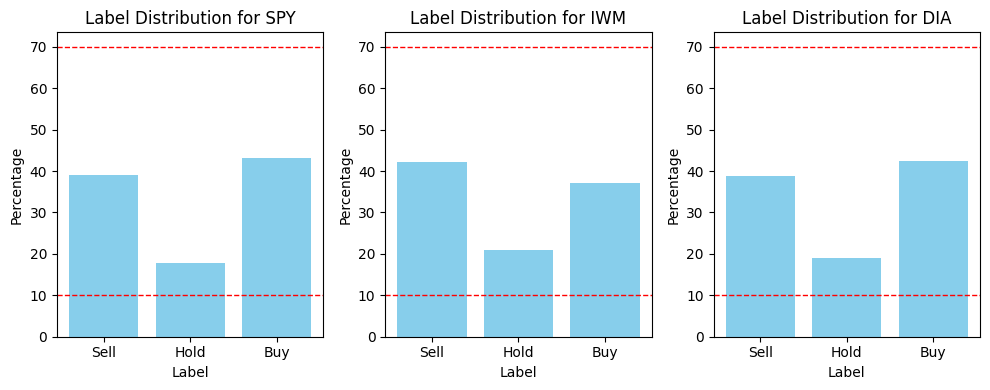

In [32]:
# Create a 3x3 grid of subplots
fig, axes = plt.subplots(1, 3, figsize=(10, 4))

# Flatten the 2D axes array to make iteration easier
axes = axes.flatten()

# Iterate through each ticker and plot the corresponding label distribution
for idx, ticker in enumerate(tickers):
    # Filter the data for the current ticker
    df = combined_df[combined_df['Ticker'] == ticker]

    df = df.copy()
    df['Label_name'] = df['Label'].map({0: 'Sell', 1: 'Hold', 2: 'Buy'})
    
    # Plot the bar chart for the current ticker
    axes[idx].bar(df['Label_name'], df['Percentage'], color='skyblue')
    
    # Add red dotted lines at y=10 and y=70
    axes[idx].axhline(y=10, color='red', linestyle='--', linewidth=1)
    axes[idx].axhline(y=70, color='red', linestyle='--', linewidth=1)

    # Set title and labels
    axes[idx].set_title(f'Label Distribution for {ticker}')
    axes[idx].set_xlabel('Label')
    axes[idx].set_ylabel('Percentage')
    
    # Set x-axis ticks to be discrete (0, 1, 2)
    axes[idx].set_xticks([0, 1, 2])
    axes[idx].tick_params(axis='x')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

# Correlation of Features

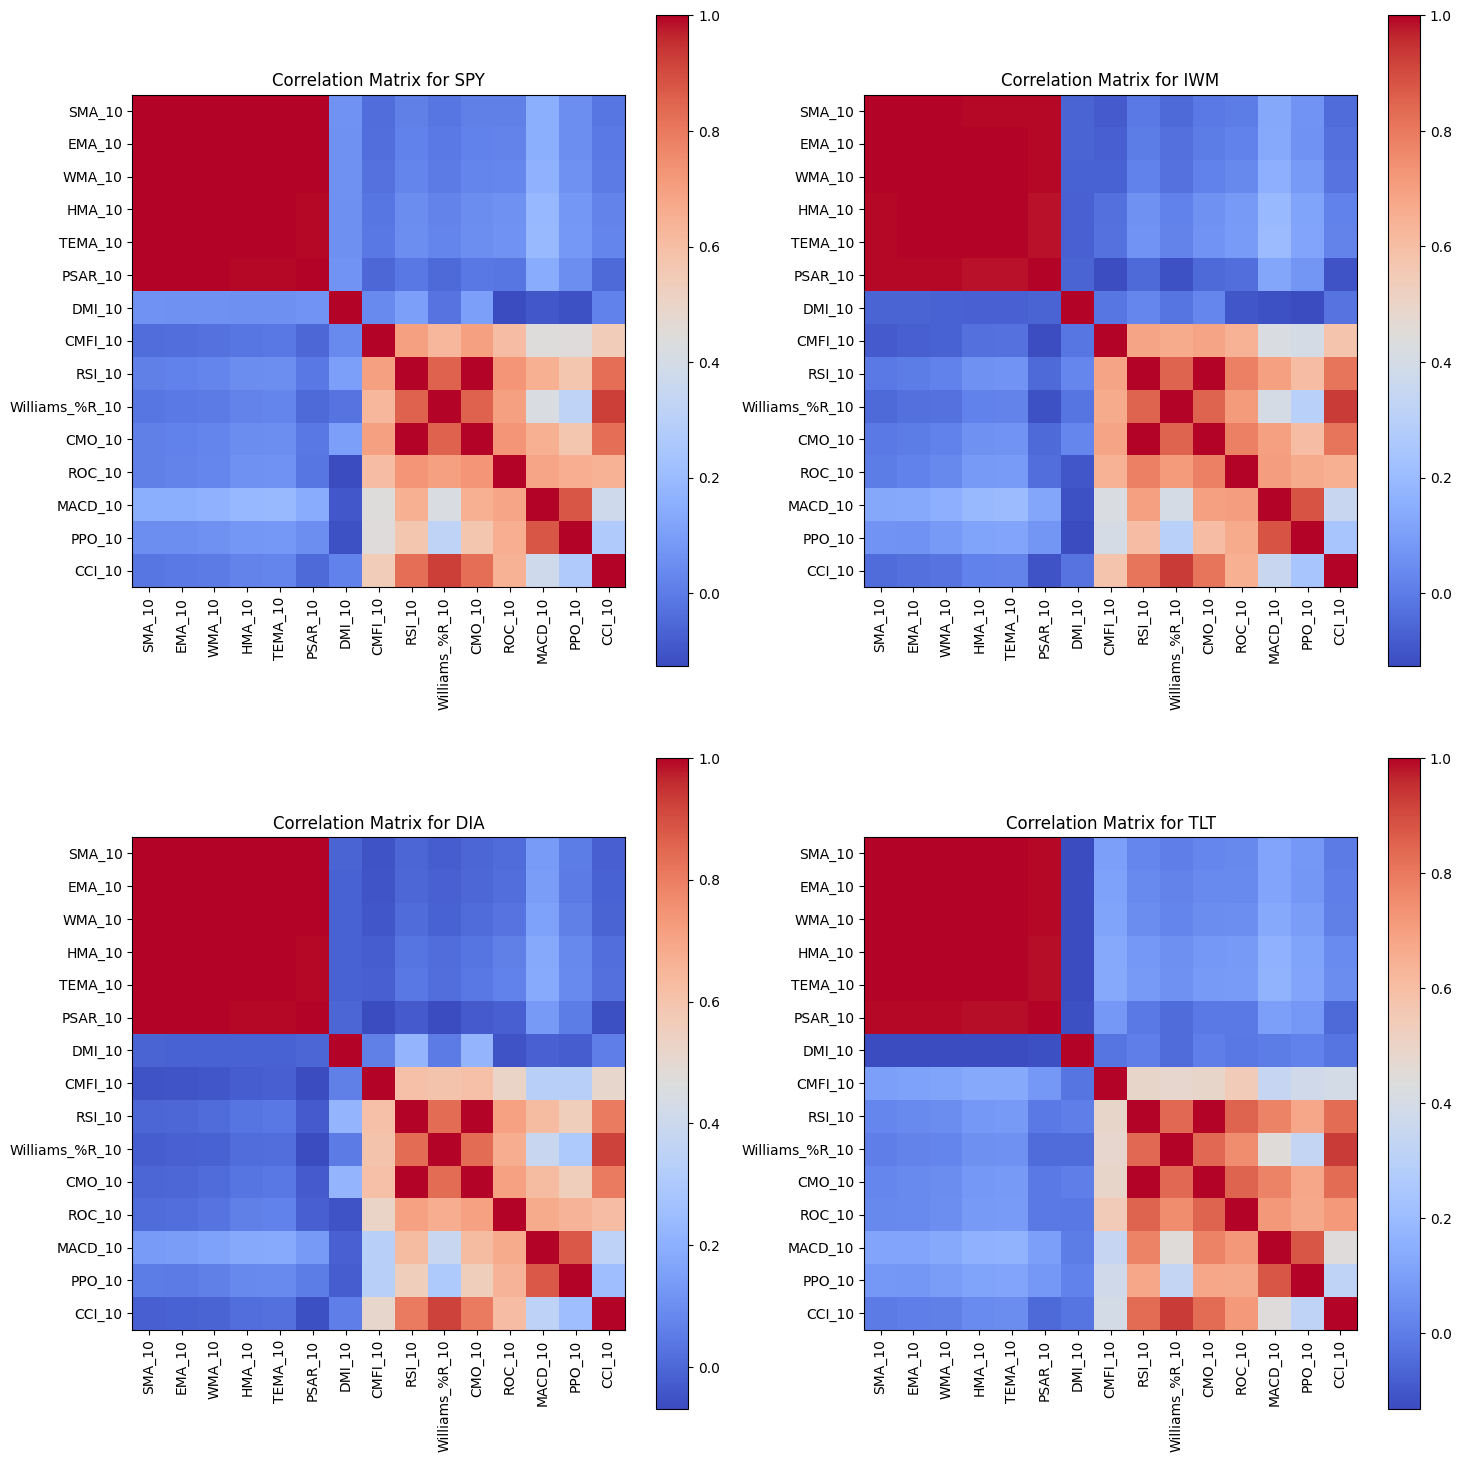

In [6]:
# Create a 3x3 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 15))

# Flatten the 2D axes array to make iteration easier
axes = axes.flatten()

# Define the correct order of indicators
indicators_order = [
    'SMA', 'EMA', 'WMA', 'HMA', 'TEMA',
    'PSAR', 'DMI', 'CMFI',
    'RSI', 'Williams_%R', 'CMO', 'ROC',
    'MACD', 'PPO', 'CCI'
]

# Iterate over each ticker and its corresponding subplot
for idx, ticker in enumerate(tickers):
    ticker_df = pd.DataFrame()  # Initialize an empty DataFrame to store data for this ticker
    
    # Iterate through years from 2019 to 2023
    for year in range(2019, 2024):
        df = pd.read_csv(f'./data/normalised/{ticker}_{year}_{year+1}.csv')
        ticker_df = pd.concat([ticker_df, df], ignore_index=True)
    
    # Drop duplicates based on 'Date' and 'Label', keep the first occurrence
    ticker_df = ticker_df.drop_duplicates(subset=['Date', 'Label'], keep='first')
    
    # Select columns that end with '_6' (assuming these are the indicators you're interested in)
    ticker_df = ticker_df.loc[:, ticker_df.columns.str.endswith('_10')]

    # Rearrange columns according to the defined indicator order
    # Create a list of column names based on the defined indicator order
    indicators_order_num = [f'{indicator}_10' for indicator in indicators_order]
    
    # Ensure the columns in ticker_df are rearranged according to indicators_order_num
    ticker_df = ticker_df[indicators_order_num]

    # Compute the correlation matrix for the remaining numeric columns
    corr = ticker_df.corr()
    
    # Plot the correlation matrix in the corresponding subplot
    cax = axes[idx].imshow(corr, cmap='coolwarm', interpolation='nearest')
    
    # Set title and color bar
    axes[idx].set_title(f'Correlation Matrix for {ticker}', fontsize=12)
    plt.colorbar(cax, ax=axes[idx])  # Add color bar to each subplot
    
    # Set x and y ticks to match the column names
    axes[idx].set_xticks(range(len(corr.columns)))
    axes[idx].set_xticklabels(corr.columns, rotation=90, fontsize=10)
    axes[idx].set_yticks(range(len(corr.columns)))
    axes[idx].set_yticklabels(corr.columns, fontsize=10)
    
# Adjust layout to prevent overlap and make it look nice
plt.tight_layout()

# Show the plot
plt.show()

# Sample Image

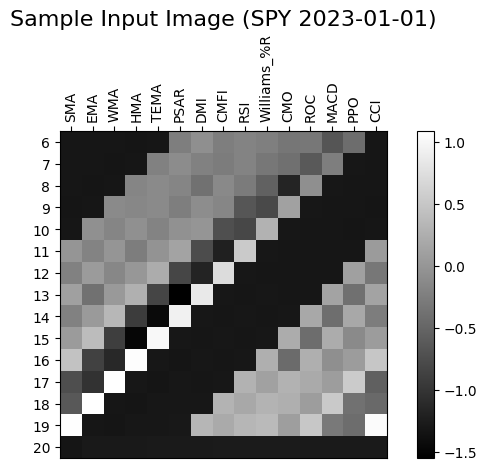

In [7]:
# Load the data
sample_img = pd.read_csv('./data/normalised/SPY_2023_2024.csv')
sample_img = sample_img.drop(columns=['Date', 'Label', 'Close', 'ATR'])

# Turn the first row of the DataFrame into a numpy array and reshape it to 15x15
sample_img = sample_img.iloc[0, :225].to_numpy()  # Adjust the selection to 225 elements
sample_img = sample_img.reshape(15, 15)

# Plot the image
plt.imshow(sample_img, cmap='grey')
plt.colorbar()

# Set x-axis to the top
plt.gca().xaxis.set_ticks_position('top')

# Set custom x-axis labels (the 15 indicators)
x_labels = [
    'SMA', 'EMA', 'WMA', 'HMA', 'TEMA',
    'PSAR', 'DMI', 'CMFI',
    'RSI', 'Williams_%R', 'CMO', 'ROC',
    'MACD', 'PPO', 'CCI'
]
plt.xticks(range(15), x_labels, rotation=90)  # Position ticks at the x-axis and apply the labels

# Set custom y-axis ticks from 6 to 20
plt.yticks(range(15), range(6, 21))  # Set y-ticks from 6 to 20

# Title
plt.title('Sample Input Image (SPY 2023-01-01)', fontsize=16)

# Display the plot
plt.tight_layout()
plt.show()

# Combined Results

In [10]:
# Initialize an empty list to store the classification reports and confusion matrices
all_reports = {}
all_confusion_matrices = {}

# Initialize lists to store all true and predicted labels for combined metrics
all_y_true = []
all_y_pred = []

# Iterate over each ticker
for ticker in tickers:
    ticker_results = pd.DataFrame()

    # Iterate through years from 2019 to 2023
    for year in range(2019, 2024):
        df = pd.read_csv(f'./results_{VERSION_NAME}/{ticker}_{year}_{year+1}.csv')
        df = df[['Date', 'Label', 'Prediction']]  # Assuming 'Prediction' is the model's predicted class
        ticker_results = pd.concat([ticker_results, df], ignore_index=True)
    
    # Drop duplicates (keep the first occurrence)
    ticker_results = ticker_results.drop_duplicates(keep='first')

    # Extract the true labels and predicted labels
    y_true = ticker_results['Label']
    y_pred = ticker_results['Prediction']
    
    # Append to the combined true and predicted lists
    all_y_true.extend(y_true)
    all_y_pred.extend(y_pred)
    
    # Calculate the classification report and confusion matrix for the current ticker
    report = classification_report(y_true, y_pred, output_dict=True)
    confusion_mat = confusion_matrix(y_true, y_pred)
    
    # Store the report and confusion matrix for the current ticker
    all_reports[ticker] = report
    all_confusion_matrices[ticker] = confusion_mat

# Calculate the combined overall classification report and confusion matrix
combined_report = classification_report(all_y_true, all_y_pred, output_dict=True)
combined_confusion_matrix = confusion_matrix(all_y_true, all_y_pred)

# Convert all_reports to a DataFrame to have a summarized view
reports_df = all_reports
confusion_matrices_df = all_confusion_matrices


In [19]:
# combined_confusion_matrix
pd.DataFrame(combined_confusion_matrix)

,0,1,2
0,1162,127,1307
1,235,47,304
2,1050,172,1568


In [11]:
# combined_report
pd.DataFrame(combined_report).round(3)

,0.0,1.0,2.0,accuracy,macro avg,weighted avg
precision,0.475,0.136,0.493,0.465,0.368,0.450
recall,0.448,0.080,0.562,0.465,0.363,0.465
f1-score,0.461,0.101,0.525,0.465,0.362,0.456
support,2596.000,586.000,2790.000,0.465,5972.000,5972.000


In [21]:
# confusion_matrices_df['SPY']
pd.DataFrame(confusion_matrices_df['SPY'])

,0,1,2
0,398,37,472
1,43,15,83
2,412,50,596


In [20]:
# reports_df['SPY']
pd.DataFrame(reports_df['SPY']).round(3)

,0.0,1.0,2.0,accuracy,macro avg,weighted avg
precision,0.467,0.147,0.518,0.479,0.377,0.471
recall,0.439,0.106,0.563,0.479,0.370,0.479
f1-score,0.452,0.123,0.540,0.479,0.372,0.474
support,907.000,141.000,1058.000,0.479,2106.000,2106.000


In [17]:
# confusion_matrices_df['IWM']
pd.DataFrame(confusion_matrices_df['IWM'])

,0,1,2
0,472,62,307
1,113,22,87
2,349,93,373


In [14]:
# reports_df['IWM']
pd.DataFrame(reports_df['IWM']).round(3)

,0.0,1.0,2.0,accuracy,macro avg,weighted avg
precision,0.505,0.124,0.486,0.462,0.372,0.452
recall,0.561,0.099,0.458,0.462,0.373,0.462
f1-score,0.532,0.110,0.472,0.462,0.371,0.456
support,841.000,222.000,815.000,0.462,1878.000,1878.000


In [18]:
# confusion_matrices_df['DIA']
pd.DataFrame(confusion_matrices_df['DIA'])

,0,1,2
0,292,28,528
1,79,10,134
2,289,29,599


In [15]:
# reports_df['DIA']
pd.DataFrame(reports_df['DIA']).round(3)

,0.0,1.0,2.0,accuracy,macro avg,weighted avg
precision,0.442,0.149,0.475,0.453,0.356,0.425
recall,0.344,0.045,0.653,0.453,0.347,0.453
f1-score,0.387,0.069,0.550,0.453,0.335,0.427
support,848.000,223.000,917.000,0.453,1988.000,1988.000
